### BERT
The embeddings that we created when discussing Word2vec and fastText were static in the sense that no matter what context a word was being used in, its embedding would be the same.

Let's consider an example to understand this:

Apple is a fruit

Apple is a company

In both these sentences, no matter what context Apple is being used in, the embeddings for the word would be the same. Instead, we should work on building techniques that can provide representations of a word based on the current context it is being used in.

Moreover, we need to build semi-supervised models that could be pre-trained on a broader task and later be fine-tuned to a specific task. The knowledge built while solving the broader task could be applied to solve a different but related task. This is referred to as transfer learning.

BERT catered to both our aforementioned problems in its own unique way. Researchers at Google developed BERT and made the methodology that they used to build BERT open source, along with the pre-trained weights.

Let's look into the architecture for BERT next.

#### The BERT architecture

We read about Transformers in the previous section. BERT was built using the encoder component of the Transformer architecture. BERT is nothing but a set of stacked encoders, as we saw in the previous section. The researchers built two variants of the BERT model, as summarized in the following table:

The Transformer architecture upon which BERT was built had six stacked encoders. The hidden layer size (that is, the number of hidden units in the feedforward layers) was 512 and it had 8 self-attention heads. The details of the various layers in BERT are the same as what we discussed while talking about Transformers.

#### The BERT model input and output

Since the BERT model was built such that it could be fine-tuned to a wide variety of tasks, its inputs and outputs needed to be designed carefully such that they could handle single-sentence tasks such as text classification, along with two-sentence tasks such as question answering. The BERT model was built with a vocabulary of 30,000 words and used the WordPiece tokenizer for tokenization.

The BERT model input is explained in the following diagram. Let's try and understand each of the input components in the diagram.

The first input token to the BERT model is the [CLS] token, where CLS stands for Classification. It is a special token and the final hidden state output from the BERT model corresponding to this token is used for classification tasks. The [CLS] token carries the output for single-sentence classification tasks.

For two-sentence tasks, the sentences are brought in together and separated by a special [SEP] token, which helps to differentiate between the sentences. In addition to the [SEP] token, an additional learned embedding is added to the token to represent whether it belongs to the first sentence or the second.

As with Transformers, a positional embedding is added to the tokens for the same reason we discussed regarding Transformers.

Hence, the input for every token to the BERT model is a sum of the token embeddings, positional embeddings, and segment embeddings:

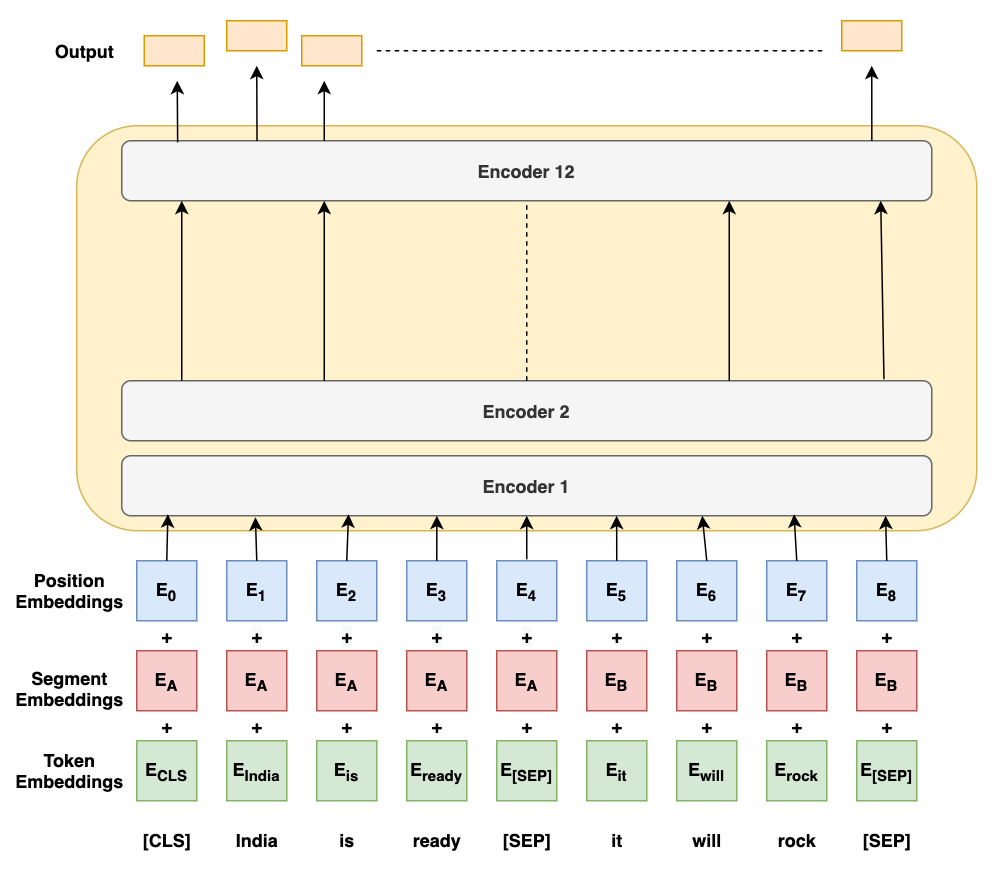

In [1]:
from IPython.display import Image
Image(filename='./images/bert.png',height=400,width=400) 

Now that we have talked about the inputs, let's briefly discuss the outputs. The BERT model at every position on a vector of size 768 is BERTBASE and a vector of size 1024 is the BERTLARGE model. These output vectors can be used differently depending on the fine-tuning task to be solved.

So, we've understood that BERT is such a cool thing, along with its architecture and the inputs and outputs for the model. One thing that we haven't got a sense of yet is how it was trained. Let's investigate this now.

#### How did BERT the pre-training happen?
The BERT model was pre-trained using two unsupervised tasks, namely the masked language model and next-sentence prediction. Let's look at the details of these next.

### THE MASKED LANGUAGE MODEL
Conditional language models prior to BERT were built using either the left-to-right approach or the right-to-left approach. We know that a bidirectional approach that can look both backward and forward would be more powerful than a unidirectional model. However, since with Transformers we have a multilayered context, the bidirectional approach would allow each token to indirectly see itself.

How do we build a model that can be conditioned using both the left and right contexts?

The developers of BERT decided to use masks to allow bidirectional conditioning. The BERT model picks 15% of the tokens at random and masks them. Next, it tries to predict these masked tokens. This process is referred to as Masked Language Modeling (MLM).

However, there is a problem with this approach: the [MASK] token will not be present during fine-tuning. In order to resolve this, among the 15% of the tokens chosen at random, let's say if the ith token is chosen, then the following would happen:

### NEXT-SENTENCE PREDICTION
During the MLM task, we did not really work with multiple sentences. However, with BERT, the thought process was to accommodate the possibility of tasks involving a pair of sentences, as often happens in question answering tasks, where the relationships between multiple sentences need to be captured. In order to do this, BERT resorted to working with a next-sentence prediction task. A pair of sentences, A and B, are input to the model such that 50% of the time, sentence B would actually be the next sentence in the corpus after sentence A where the labeling used would be IsNext, and it would not be the next sentence 50% of the time, where the labeling would be NotNext. In the next-sentence prediction task, the model would be asked to predict whether sentence B is actually the next sentence following sentence A or not.

Now we know how the BERT pre-training worked, let's look into the fine-tuning of BERT next and understand how its outputs can be utilized.

For the purpose of pre-training, we used as our datasets the Book Corpus, comprising 800 million words, and English Wikipedia, comprising 2.5 billion words.

### BERT fine-tuning
The pre-trained weights developed using the ways we've discussed can now be fine-tuned to cater to a number of tasks. Let's look at those next.

For single classification tasks, the output for position 1 carries information about the classification label. The vector from the first position is sent across to a feedforward neural network, followed by the application of the softmax function, which returns the probability distribution for the number of classes involved in the task, as shown in the following diagram:

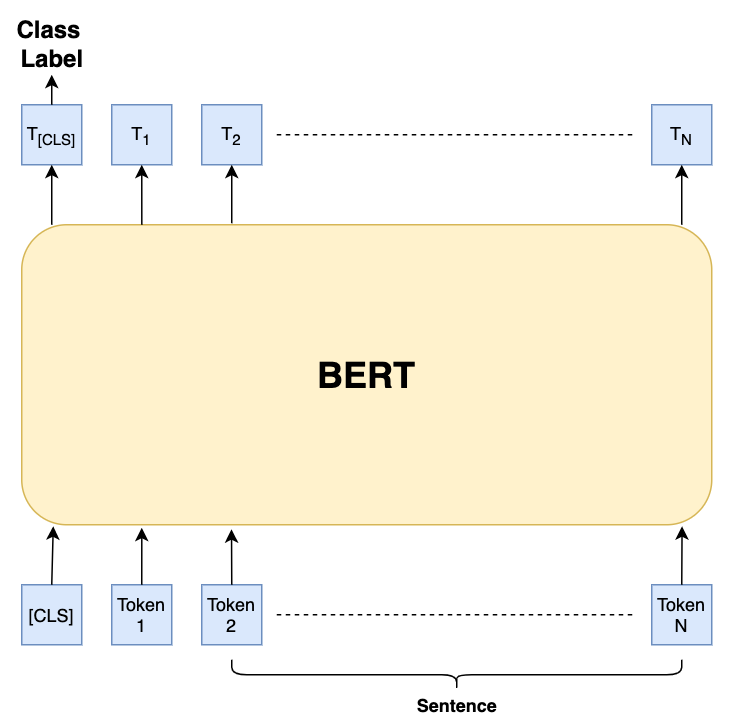

In [3]:
from IPython.display import Image
Image(filename='./images/bert1.png',height=400,width=400) 

Similarly, for sentence-pair text classification tasks, such as whether the second sentence follows the first sentence in a corpus or the second sentence is the answer to the first sentence (a question), these are classification tasks where we need to respond with a Yes or No answer. Such tasks can also make use of the first output vector to determine the results, as shown in the following diagram:

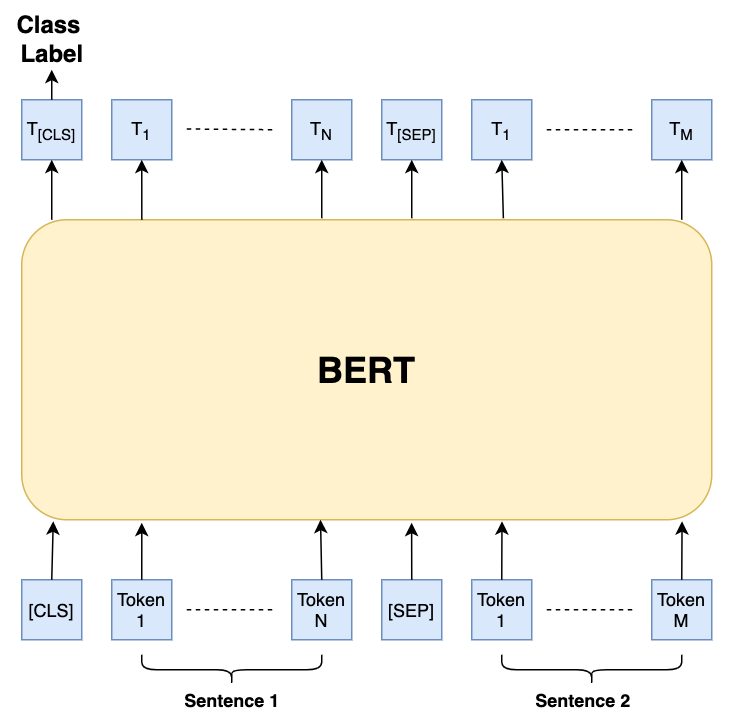

In [4]:
from IPython.display import Image
Image(filename='./images/bert2.png',height=400,width=400) 

Named Entity Recognition (NER)-like tasks want an output for each input token. For example, in an NER task, we may require the model to figure out whether the tokens in a sentence refer to a person, location, date, and so on. Each token must say which entity it is catering to from the ones we've mentioned. This is a Seq2Seq task where the size of the input should be equal to the size of the output. The BERT model outputs a vector for each position. Now, each of these position outputs can be fed to a neural network to figure out the named entity for a particular token. This is illustrated in the following diagram:

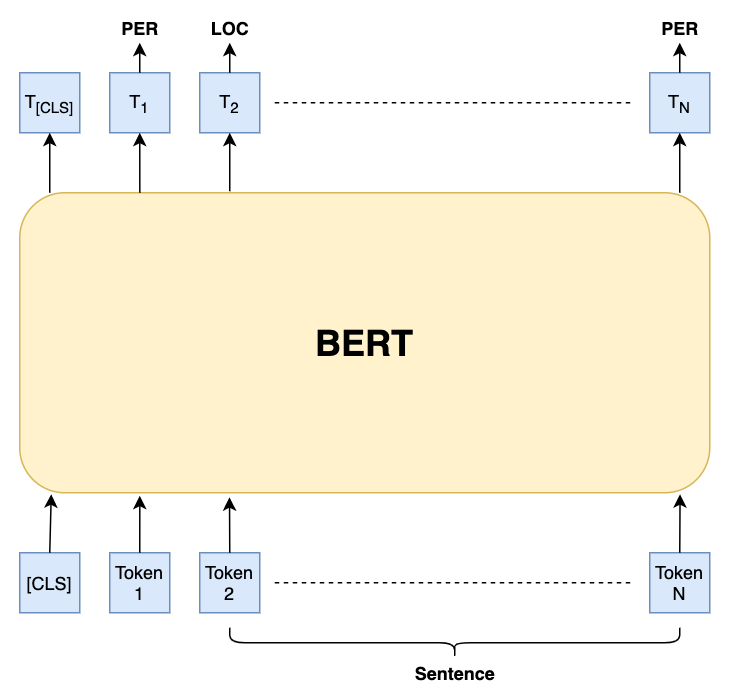

In [5]:
from IPython.display import Image
Image(filename='./images/bert3.png',height=400,width=400) 

Similarly, the BERT model can be fine-tuned for other tasks such as question answering, as shown in the following diagram:



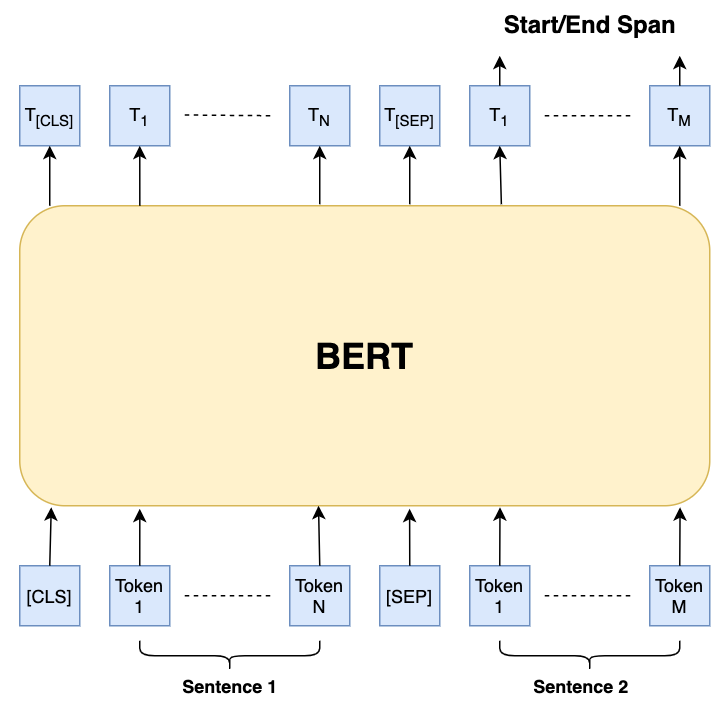

In [6]:
from IPython.display import Image
Image(filename='./images/bert4.png',height=400,width=400) 

Ideas for these have been sourced original BERT paper, BERT: Pre-Training of Deep Bidirectional Transformers for Language Understanding by Delvin et al., available at https://arxiv.org/pdf/1810.04805.pdf.

The rise of BERT revolutionized the domain of NLP and great improvements were achieved in solving numerous tasks. BERT even outperformed all the previous benchmark results for certain tasks.

The open source code for BERT is available on GitHub at https://github.com/google-research/bert.

An approach to fine-tune the BERT model for the question classification task we tried solving in Chapter 8, From Human Neurons to Artificial Neurons for Text Understanding, was made, and the code has been posted at https://github.com/amankedia/Question-Classification-using-BERT, along with the results.

Similarly, BERT can be applied to numerous tasks such as part-of-speech tagging, building chatbots, and so on.